# Wuzzaf Job Posts Exploratory Analysis

Explore jobs and job seekers applications on WUZZUF from 2014 to 2016.

In the dynamic world of online job marketplaces, achieving a harmonious equilibrium between job supply and demand is an enduring challenge. At WUZZUF, our primary goal is to optimize the platform for demand, relevance, and quality. We facilitate connections between employers and prospective applicants, and curate relevant job recommendations for job seekers. 

To gain deeper insights into this complex ecosystem, we are embarking on a data-driven project. We will be analyzing a dataset derived from WUZZUF, which spans the years 2014 to 2016, focusing on job posts and their corresponding applications. 

It is important to note that while the majority of jobs are centered in Egypt, the dataset also encompasses positions from other locations.


## Dataset Context:

This dataset contains a sample of job postings that were published on the WUZZUF platform during the period of 2014-2016.<br><br>

<details><summary> <b>Columns Overview</b> </summary>
    
* id: Unique job ID.
* city: Job location.
* job_title: Job name.
* job_category1, job_category2, job_category3: Job categories or fields.
* job_industry1, job_industry2, job_industry3: Job industries or sectors.
* salary_minimum and salary_maximum: Salary range.
* num_vacancies: Number of job openings.
* career_level: Job seniority.
* experience_years: Required experience.
* post_date: Posting date.
* views: Number of times the job was viewed.
* job_description: Description of the job.
* job_requirements: Qualifications needed.
* payment_period: Salary payment frequency.
* currency: Currency used for salaries.
    
</details>


## Data source

link on kaggle: https://www.kaggle.com/datasets/WUZZUF/wuzzuf-job-posts

In [1]:
# Import the required libraries

import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
# Read the dataset

df = pd.read_csv("./dataset/Wuzzuf_Job_Posts_Sample.csv")

## Assesing Data

In [3]:
df.head()

,id,city,job_title,job_category1,job_category2,job_category3,job_industry1,job_industry2,job_industry3,salary_minimum,salary_maximum,num_vacancies,career_level,experience_years,post_date,views,job_description,job_requirements,payment_period,currency
0,516e4ed,Ciro,Sales & Marketing Agent,Sales/Retail/Business Development,Marketing,Select,Telecommunications Services,Select,Select,2000,3500,8,Entry Level,0-1,2014-01-01 06:01:41,2602,<p><strong>Qualifications</strong>:<br /><br /...,NaN,Per Month,Egyptian Pound
1,a361ef59,Cairo,German Training Coordinator,Customer Service/Support,Administration,Human Resources,Translation and Localization,Business Services - Other,Education,1000,5000,8,Entry Level,0-2,2014-01-01 20:01:18,2213,<p>&bull;Placing jobs' ads on various websites...,NaN,Per Month,Egyptian Pound
2,7226ce78,Cairo,Junior Software Developer,IT/Software Development,Select,Select,Computer Software,Select,Select,2000,2500,1,Entry Level,2,2014-01-02 11:01:03,2940,"<span style=""text-decoration: underline;""><str...",NaN,Per Month,Egyptian Pound
3,f4b2bcd6,Cairo,Application Support Engineer,IT/Software Development,Select,Select,Telecommunications Services,Select,Select,2000,3500,1,Entry Level,1-2,2014-01-02 12:01:23,2042,"<strong><span style=""text-decoration: underlin...",NaN,Per Month,Egyptian Pound
4,3fee6f73,Alexandria,Electrical Maintenance Engineer,Engineering,Select,Select,Food and Beverage Production,Select,Select,5000,8000,1,Experienced (Non-Manager),1-3,2014-01-21 13:45:56,5684,Job Title: Electrical Maintenance Engineer<br ...,NaN,Per Month,Egyptian Pound


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21850 entries, 0 to 21849
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                21850 non-null  object
 1   city              21850 non-null  object
 2   job_title         21850 non-null  object
 3   job_category1     21850 non-null  object
 4   job_category2     21850 non-null  object
 5   job_category3     21850 non-null  object
 6   job_industry1     21850 non-null  object
 7   job_industry2     21850 non-null  object
 8   job_industry3     21850 non-null  object
 9   salary_minimum    21850 non-null  int64 
 10  salary_maximum    21850 non-null  int64 
 11  num_vacancies     21850 non-null  int64 
 12  career_level      21850 non-null  object
 13  experience_years  21850 non-null  object
 14  post_date         21850 non-null  object
 15  views             21850 non-null  int64 
 16  job_description   21576 non-null  object
 17  job_requirem

In [5]:
# Check duplicates

df.duplicated().sum()

0

**Notes:**
* Many column datatypes have to be changed.
* Some columns are useless for analysis (job_description - job_requirements) and need to drop.
* The categories in job_category1 column fields need to be separated.
* There is inconsistent data in city column ex: Cairo -> Ciro
* There is no duplicated in dataset.

## Cleaning Data

In [6]:
# Drop useless columns

df.drop(columns=['job_description', 'job_requirements'], inplace=True)

df.columns

Index(['id', 'city', 'job_title', 'job_category1', 'job_category2',
       'job_category3', 'job_industry1', 'job_industry2', 'job_industry3',
       'salary_minimum', 'salary_maximum', 'num_vacancies', 'career_level',
       'experience_years', 'post_date', 'views', 'payment_period', 'currency'],
      dtype='object')

#### Handling job category columns

In [7]:
df[['job_category1', 'job_category2', 'job_category3']].value_counts()

job_category1             job_category2                      job_category3
IT/Software Development   Select                             Select           3948
Customer Service/Support  Select                             Select           1940
Marketing                 Select                             Select           1504
Engineering               Select                             Select           1202
Creative/Design           Select                             Select           1165
                                                                              ... 
Human Resources           Editorial/Writing                  Select              1
                          Research                           Select              1
                          Sales/Retail/Business Development  Marketing           1
                                                             Research            1
Tourism/Travel            Sales/Retail/Business Development  Marketing           1
Length: 1345

In [8]:
# Create a dataFrame that refer to the job categories and then merge the main DataFrame with 

df['job_categories'] = df['job_category1'] + "/" + df['job_category2'] + "/" + df['job_category3']

df_categories = df[['id', 'job_categories']]
df_categories['job_categories'] = df_categories['job_categories'].str.split('/')

df_categories

C:\Users\ELnoor\AppData\Local\Temp\ipykernel_2028\2724625283.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_categories['job_categories'] = df_categories['job_categories'].str.split('/')


,id,job_categories
0,516e4ed,"[Sales, Retail, Business Development, Marketin..."
1,a361ef59,"[Customer Service, Support, Administration, Hu..."
2,7226ce78,"[IT, Software Development, Select, Select]"
3,f4b2bcd6,"[IT, Software Development, Select, Select]"
4,3fee6f73,"[Engineering, Select, Select]"
...,...,...
21845,cbbac897,"[Creative, Design, Select, Select]"
21846,7724db49,"[Quality Assurance, Quality Control, Biotech, ..."
21847,a6911086,"[Administration, Marketing, Sales, Retail, Bus..."
21848,6dcdc323,"[Marketing, Select, Select]"


In [9]:
# Drop categories columns from df

df.drop(columns=['job_category1','job_category2','job_category3', 'job_categories'], inplace=True)

In [10]:
list1 = []

for rowIdx in df_categories.iterrows():
    for idx in rowIdx[1][1]:
        list1.append(list([rowIdx[1][0],idx]))
        
        
df_final_categories = pd.DataFrame(list1, columns=['id', 'job_category'])
df_final_categories.head()

,id,job_category
0,516e4ed,Sales
1,516e4ed,Retail
2,516e4ed,Business Development
3,516e4ed,Marketing
4,516e4ed,Select


In [11]:
# Drop rows with ( select ) option from job_category

df_final_categories.drop(df_final_categories[df_final_categories['job_category'] == 'Select'].index, inplace=True)

In [12]:
df_modified = pd.merge(df_final_categories, df, on = 'id', how='left')

df_modified.head()

,id,job_category,city,job_title,job_industry1,job_industry2,job_industry3,salary_minimum,salary_maximum,num_vacancies,career_level,experience_years,post_date,views,payment_period,currency
0,516e4ed,Sales,Ciro,Sales & Marketing Agent,Telecommunications Services,Select,Select,2000,3500,8,Entry Level,0-1,2014-01-01 06:01:41,2602,Per Month,Egyptian Pound
1,516e4ed,Retail,Ciro,Sales & Marketing Agent,Telecommunications Services,Select,Select,2000,3500,8,Entry Level,0-1,2014-01-01 06:01:41,2602,Per Month,Egyptian Pound
2,516e4ed,Business Development,Ciro,Sales & Marketing Agent,Telecommunications Services,Select,Select,2000,3500,8,Entry Level,0-1,2014-01-01 06:01:41,2602,Per Month,Egyptian Pound
3,516e4ed,Marketing,Ciro,Sales & Marketing Agent,Telecommunications Services,Select,Select,2000,3500,8,Entry Level,0-1,2014-01-01 06:01:41,2602,Per Month,Egyptian Pound
4,a361ef59,Customer Service,Cairo,German Training Coordinator,Translation and Localization,Business Services - Other,Education,1000,5000,8,Entry Level,0-2,2014-01-01 20:01:18,2213,Per Month,Egyptian Pound


In [13]:
df_modified.shape

(67831, 16)

#### Handling job industry columns

In [14]:
df_modified[['job_industry1', 'job_industry2', 'job_industry3']].value_counts()

job_industry1                                            job_industry2                       job_industry3               
Computer Software                                        Select                              Select                          4183
Information Technology Services                          Select                              Select                          3573
Telecommunications Services                              Select                              Select                          2169
Advertising and PR Services                              Select                              Select                          1584
Computer/IT Services                                     Select                              Select                          1315
                                                                                                                             ... 
Construction - Industrial Facilities and Infrastructure  Business Services - Other           Gover

In [15]:
# Create a dataFrame that refer to the job industries and then merge the main DataFrame with 
# as we did in the previous step 

df_modified['job_industries'] = df_modified['job_industry1'] + "/" + df_modified['job_industry2'] + "/" + df_modified['job_industry3']

df_industries = df_modified[['id', 'job_industries']]
df_industries['job_industries'] = df_industries['job_industries'].str.split('/')

df_industries

C:\Users\ELnoor\AppData\Local\Temp\ipykernel_2028\2775014274.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_industries['job_industries'] = df_industries['job_industries'].str.split('/')


,id,job_industries
0,516e4ed,"[Telecommunications Services, Select, Select]"
1,516e4ed,"[Telecommunications Services, Select, Select]"
2,516e4ed,"[Telecommunications Services, Select, Select]"
3,516e4ed,"[Telecommunications Services, Select, Select]"
4,a361ef59,"[Translation and Localization , Business Ser..."
...,...,...
67826,eb59b18d,"[Computer, IT Services, Information Technology..."
67827,eb59b18d,"[Computer, IT Services, Information Technology..."
67828,eb59b18d,"[Computer, IT Services, Information Technology..."
67829,eb59b18d,"[Computer, IT Services, Information Technology..."


In [16]:
list2 = []

for rowIdx in df_industries.iterrows():
    for idx in rowIdx[1][1]:
        list2.append(list([rowIdx[1][0],idx]))
        
        
df_final_industries = pd.DataFrame(list2, columns=['id', 'job_industry'])
df_final_industries.head()

,id,job_industry
0,516e4ed,Telecommunications Services
1,516e4ed,Select
2,516e4ed,Select
3,516e4ed,Telecommunications Services
4,516e4ed,Select


In [17]:
# Drop rows with ( select ) option from job_industry

df_final_industries.drop(df_final_industries[df_final_industries['job_industry'] == 'Select'].index, inplace=True)

In [18]:
# Drop industries columns from df

df_modified.drop(columns=['job_industry1','job_industry2','job_industry3', 'job_industries'], inplace=True)

In [19]:
df_last_modified = pd.merge(df_final_industries, df_modified, on = 'id', how='left')

df_last_modified.head()

,id,job_industry,job_category,city,job_title,salary_minimum,salary_maximum,num_vacancies,career_level,experience_years,post_date,views,payment_period,currency
0,516e4ed,Telecommunications Services,Sales,Ciro,Sales & Marketing Agent,2000,3500,8,Entry Level,0-1,2014-01-01 06:01:41,2602,Per Month,Egyptian Pound
1,516e4ed,Telecommunications Services,Retail,Ciro,Sales & Marketing Agent,2000,3500,8,Entry Level,0-1,2014-01-01 06:01:41,2602,Per Month,Egyptian Pound
2,516e4ed,Telecommunications Services,Business Development,Ciro,Sales & Marketing Agent,2000,3500,8,Entry Level,0-1,2014-01-01 06:01:41,2602,Per Month,Egyptian Pound
3,516e4ed,Telecommunications Services,Marketing,Ciro,Sales & Marketing Agent,2000,3500,8,Entry Level,0-1,2014-01-01 06:01:41,2602,Per Month,Egyptian Pound
4,516e4ed,Telecommunications Services,Sales,Ciro,Sales & Marketing Agent,2000,3500,8,Entry Level,0-1,2014-01-01 06:01:41,2602,Per Month,Egyptian Pound


In [20]:
df_last_modified.shape

(514018, 14)

#### Handling city column 

In [21]:
cities = df_last_modified['city'].unique()
cities

array(['Ciro', 'Cairo', 'Alexandria', '6 th of October city', 'cairo,',
       'all Governments', 'Alexnadria', '6th of October', 'Any Location',
       '6 of October', '6th of October City', 'Giza', 'Cairo - Maadi',
       'Mansoura , Tanta , KFS , Damanhour , Zagazig , Damita, Banha & Fakos',
       'Cairo, Alex, Delta, Upper, Egypt', 'Nasr City, Cairo',
       '6 October', 'Giza-6 October', 'maadi', 'Isamilia', 'Ismalia',
       'October Industrial Zone', 'Cairo, Mansoura, Tanta',
       'Cairo, Alex , Tanta , Mansoura', 'Cairo, Alex, Tanta, Mansoura',
       'cairo - giza -alex', 'El Mahlla El Koubra', 'nasr city',
       'El mahalla el koubra', '10 of Ramadan', '10th of Ramadan',
       'Mansoura', 'Cairo - Alex', 'New Cairo', 'Ismailia', '6th october',
       'Cairo - New Cairo', 'Al-behira', 'Tanta',
       'Cairo - Damitte - Alex & suez',
       'Alexandria, Ain Sokhna, Hurghada', 'Cairo/Giza', 'Banha',
       'Cairo, Alexanderia and Assuit', 'Assuit', 'alexanderia',
       'Do

In [22]:
# Create a fuction that handle incosistent data in cities ex: Cairo & Alexandria  

def citiesHanling(city):
    if city in ['cairo', 'ciro', 'CAIRO - EGYPT', 'القاهرة' ,'القاهره']:
        city = 'Cairo'
    elif city in ['alex', 'Alex', 'الإسكندرية', 'Alexadnria']:
        city = 'Alexandria'
        
    return city

In [23]:
# cities handling 

df_last_modified['city'] = df_last_modified['city'].apply(citiesHanling)

In [24]:
df_last_modified.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 514018 entries, 0 to 514017
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                514018 non-null  object
 1   job_industry      514018 non-null  object
 2   job_category      514018 non-null  object
 3   city              514018 non-null  object
 4   job_title         514018 non-null  object
 5   salary_minimum    514018 non-null  int64 
 6   salary_maximum    514018 non-null  int64 
 7   num_vacancies     514018 non-null  int64 
 8   career_level      514018 non-null  object
 9   experience_years  514018 non-null  object
 10  post_date         514018 non-null  object
 11  views             514018 non-null  int64 
 12  payment_period    513999 non-null  object
 13  currency          513999 non-null  object
dtypes: int64(4), object(10)
memory usage: 58.8+ MB


#### Avg. Salary column

In [45]:
# Create salary_avg column 

df_last_modified['salary_avg'] = (df_last_modified['salary_minimum'] + df_last_modified['salary_maximum'])/2

In [46]:
df_last_modified[['salary_minimum', 'salary_maximum', 'salary_avg']].head()

,salary_minimum,salary_maximum,salary_avg
0,2000,3500,2750.0
1,2000,3500,2750.0
2,2000,3500,2750.0
3,2000,3500,2750.0
4,2000,3500,2750.0


* Data is ready for analysis

## Exploratory Data Analysis

#### Most popular job categories

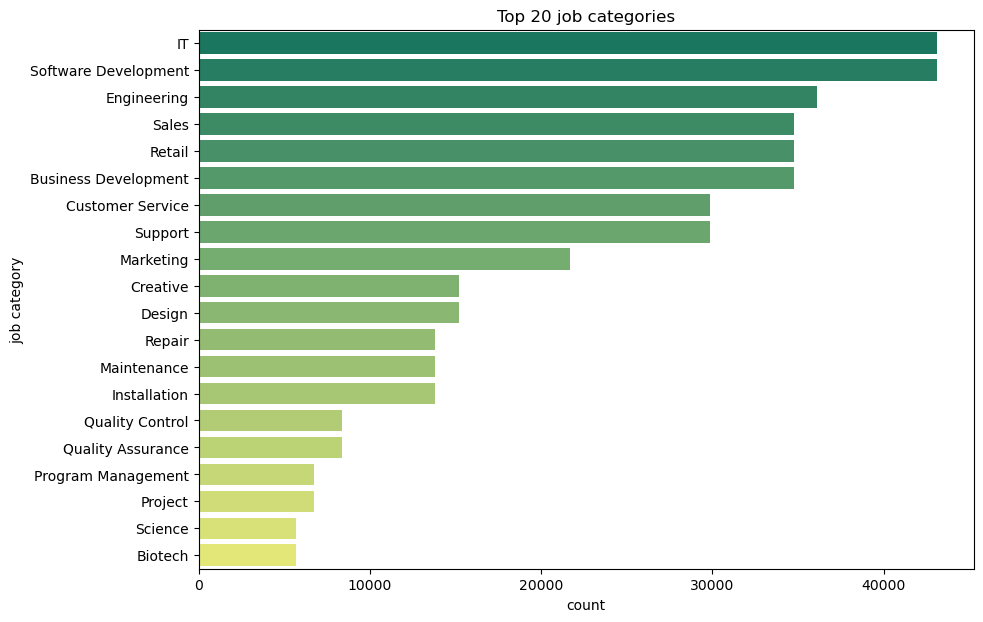

In [25]:
# create a countplot that display which categories is the most

plt.figure(figsize=(10,7))
order = df_last_modified['job_category'].value_counts()
order = order[0:20].index

sns.countplot(data=df_last_modified, y ='job_category', order=order ,palette = 'summer');
plt.ylabel('job category');
plt.title("Top 20 job categories");

#### Most popular job industries

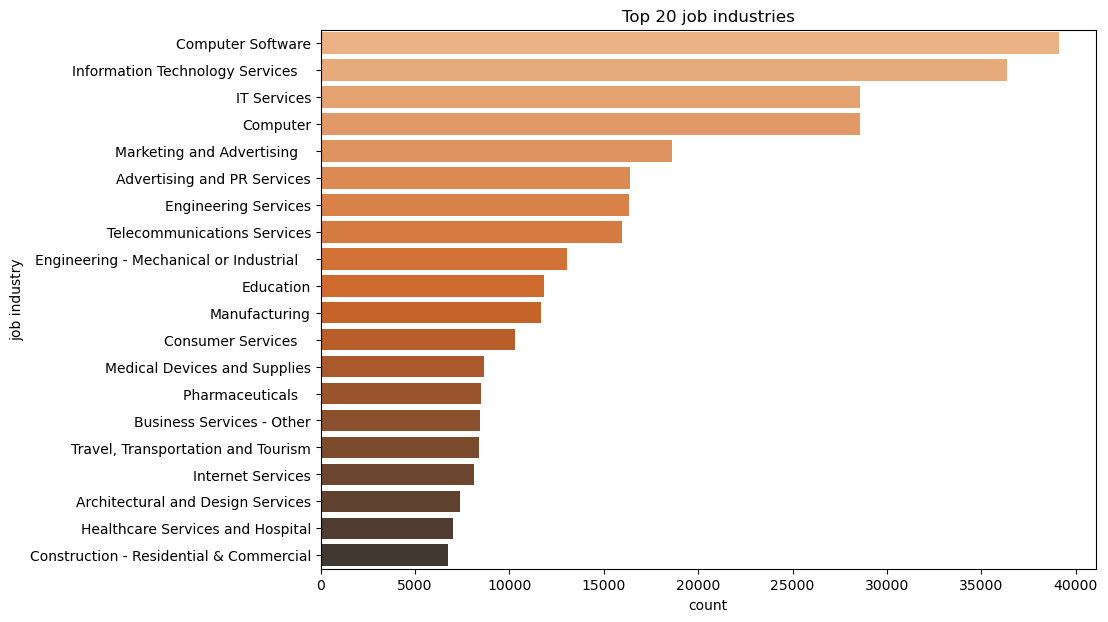

In [26]:
# create a countplot that display which idustry is the most

plt.figure(figsize=(10,7))
order = df_last_modified['job_industry'].value_counts()
order = order[0:20].index

sns.countplot(data=df_last_modified, y ='job_industry', order=order ,palette = 'Oranges_d');
plt.ylabel('job industry');
plt.title("Top 20 job industries");

#### Most active cities in jobs

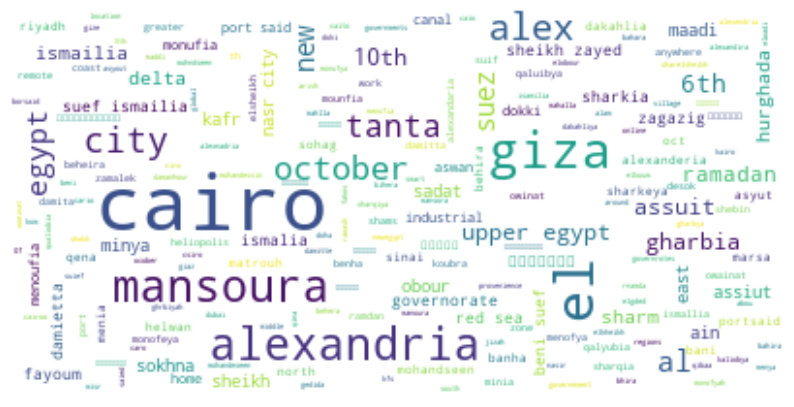

In [27]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

c_list=[]
for i in df_last_modified['city'].unique():
    c_list.append(i.lower())
   
plt.figure(figsize=[10,7]);
words = ' '.join(c_list);


# Generate a word cloud image
wordcloud = WordCloud().generate(words)


# lower max_font_size
wordcloud = WordCloud(max_font_size=40,background_color="white").generate(words)

plt.imshow(wordcloud, interpolation="bilinear")

plt.axis("off")

plt.show()

#### Most common job titles

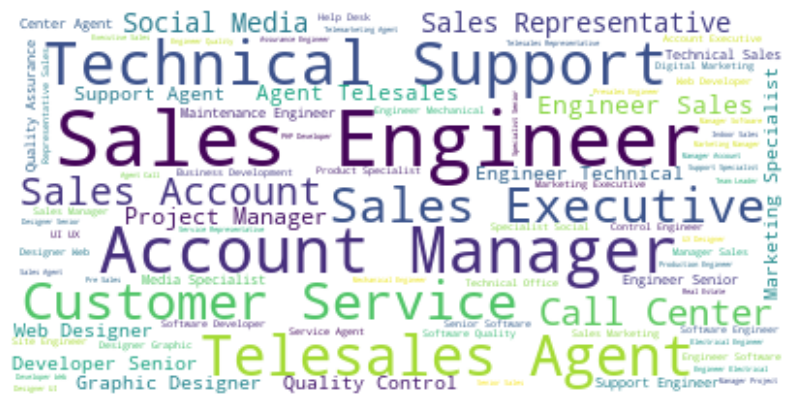

In [30]:
plt.figure(figsize=[10,7]);
words = ' '.join(df_last_modified['job_title']);


# Generate a word cloud image
wordcloud = WordCloud().generate(words)


# lower max_font_size
wordcloud = WordCloud(max_font_size=40,background_color="white").generate(words)

plt.imshow(wordcloud, interpolation="bilinear")

plt.axis("off")

plt.show()

#### Job posts count according Career level

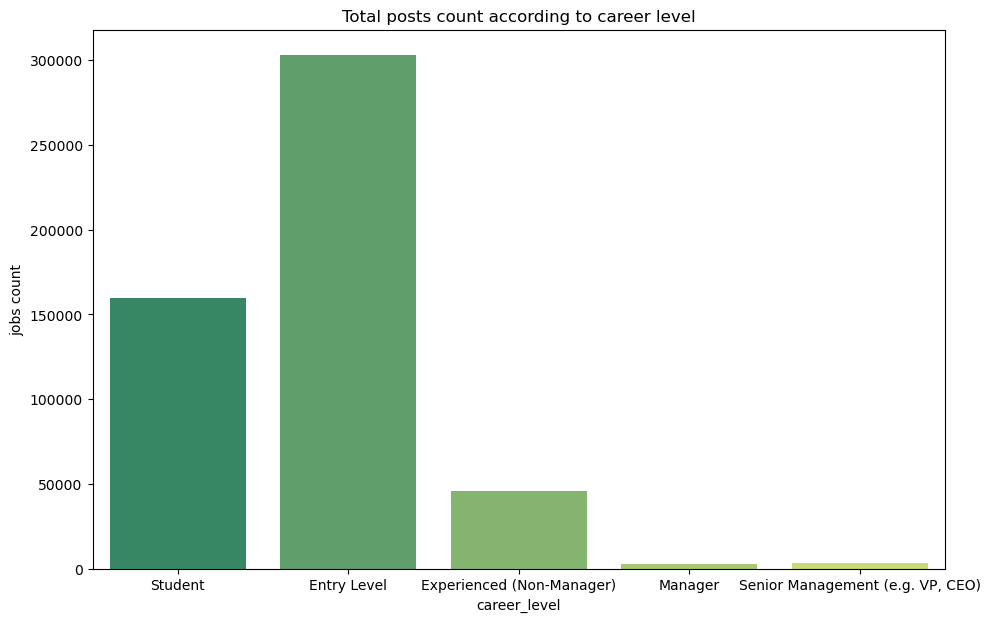

In [40]:
# create a countplot that display which career level is the most

custom_career_level= ['Student', 'Entry Level','Experienced (Non-Manager)', 'Manager', 'Senior Management (e.g. VP, CEO)']

plt.figure(figsize=(11,7))
sns.countplot(data=df_last_modified, x =df_last_modified['career_level'], palette = 'summer');

plt.xticks(range(len(custom_career_level)), custom_career_level)
plt.ylabel('jobs count');
plt.title("Total posts count according to career level");

#### Salaries according to different Career level

In [51]:
selected_rows = df_last_modified[df_last_modified['career_level'] == 'Manager']
selected_columns = selected_rows[['salary_minimum', 'salary_maximum', 'salary_avg']]
print(selected_columns.head())


     salary_minimum  salary_maximum  salary_avg
73             3000            5000      4000.0
74             3000            5000      4000.0
75             3000            5000      4000.0
76             3000            5000      4000.0
203            6500            8000      7250.0


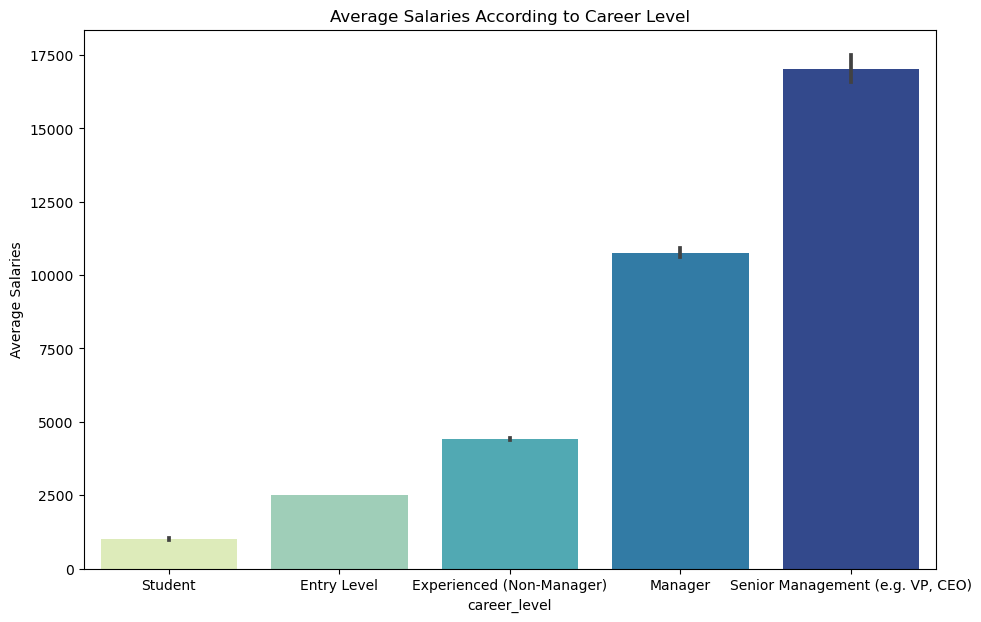

In [56]:
# create a bar chart that display which categories is the Average Salaries per career level

custom_career_level = ['Student', 'Entry Level', 'Experienced (Non-Manager)', 'Manager', 'Senior Management (e.g. VP, CEO)']

plt.figure(figsize=(11, 7))

sns.barplot(data=df_last_modified, x='career_level', y='salary_avg', palette='YlGnBu', order=custom_career_level);

plt.ylabel('Average Salaries');
plt.title("Average Salaries According to Career Level");
plt.xticks(range(len(custom_career_level)), custom_career_level);

#### Average Salaries according to years of experience 

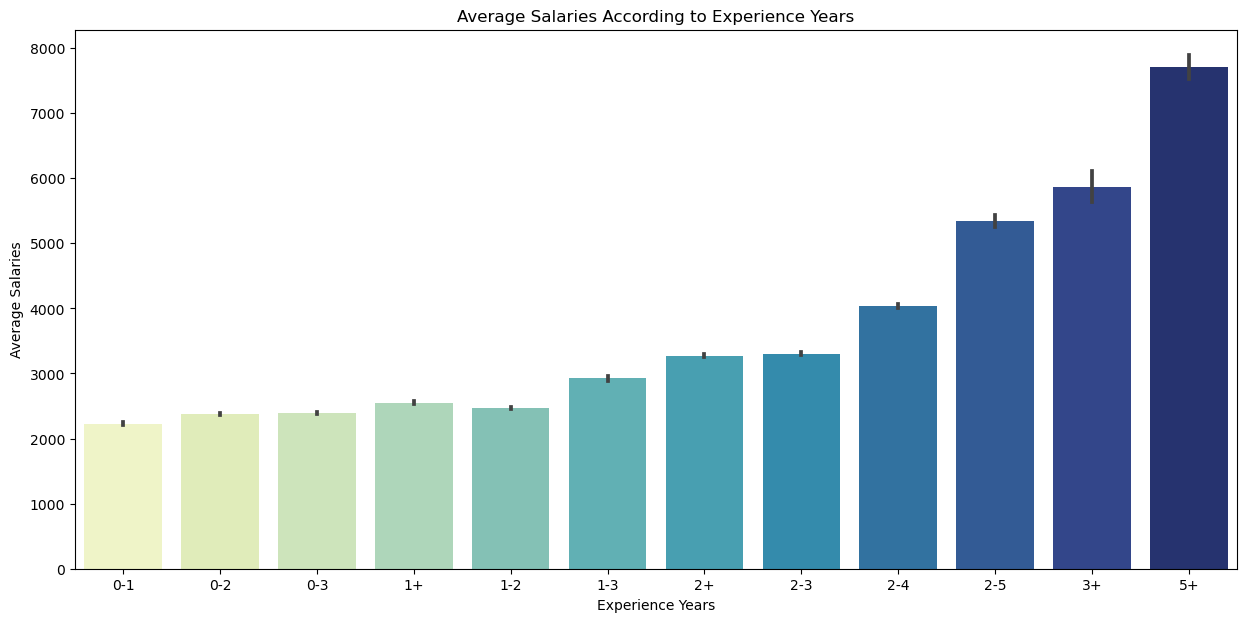

In [67]:
# create a bar chart that display which categories is the Average Salaries per exp. years

order_experience_years = ['0-1', '0-2', '0-3', '1+', '1-2', '1-3', '2+', '2-3', '2-4', '2-5', '3+', '5+']

plt.figure(figsize=(15, 7))

sns.barplot(data=df_last_modified, x='experience_years', y='salary_avg', palette='YlGnBu', order=order_experience_years);

plt.xlabel('Experience Years');
plt.ylabel('Average Salaries');
plt.title("Average Salaries According to Experience Years");